Importamos las librerías
Pegar archivo database_df_fechas_y_dhn.pkl

In [1]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, roc_auc_score,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer



Importamos los datos provenientes del Colab 1

In [2]:
path_database_info_completa='/content/database_df_fechas_y_dhn.pkl'

df=pd.read_pickle(path_database_info_completa)

df

,Fecha Reunión + 1 BD,Publicacion Minuta + 1 BD,Fecha Siguiente Reunión + 1 BD,Fecha Siguiente Reunión,Decisión Política Monetaria,Fed Target Rate,Effective Fed Funds Rate,Tasa 1 Mes,Tasa 3 Meses,Dovish,Hawkish,Neutral
1995-02-01,1995-02-02,1995-04-03,1995-03-29,1995-03-28,0.00,6.000,NaN,NaN,5.70,0.041030,0.309371,0.649599
1995-03-28,1995-03-29,1995-05-29,1995-05-24,1995-05-23,0.00,6.000,NaN,NaN,5.66,0.127621,0.207176,0.665203
1995-05-23,1995-05-24,1995-07-10,1995-07-07,1995-07-06,-0.25,5.750,NaN,NaN,5.36,0.190530,0.221339,0.588130
1995-07-06,1995-07-07,1995-08-28,1995-08-23,1995-08-22,0.00,5.750,NaN,NaN,5.31,0.207284,0.187037,0.605679
1995-08-22,1995-08-23,1995-10-02,1995-09-27,1995-09-26,0.00,5.750,NaN,NaN,5.26,0.132782,0.176945,0.690272
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-14,2023-06-15,2023-07-06,2023-07-27,2023-07-26,0.25,5.125,5.08,5.15,5.23,0.100451,0.410815,0.488733
2023-07-26,2023-07-27,2023-08-17,2023-09-21,2023-09-20,0.00,5.375,5.33,5.28,5.29,0.158601,0.479939,0.361460
2023-09-20,2023-09-21,2023-10-12,2023-11-02,2023-11-01,0.00,5.375,5.33,5.34,5.35,0.135375,0.452688,0.411937
2023-11-01,2023-11-02,2023-11-22,2023-12-14,2023-12-13,0.00,5.375,5.33,5.31,5.27,0.098530,0.503840,0.397630


Analizamos, si hay outliers

In [ ]:
df.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
Decisión Política Monetaria,213.0,-0.000587,0.277523,-1.500000,0.000000,0.000000,0.000000,0.750000
Fed Target Rate,213.0,2.133803,2.127010,0.125000,0.125000,1.375000,4.500000,6.500000
Effective Fed Funds Rate,213.0,2.119343,2.108575,0.050000,0.150000,1.420000,4.330000,6.860000
Tasa 3 Meses,213.0,1.977183,1.985576,0.010000,0.110000,1.290000,3.950000,6.170000
Tasa 1 Mes,213.0,1.823286,1.896373,0.000000,0.090000,1.160000,3.458000,6.188000
Dovish,213.0,0.249280,0.152336,0.003213,0.124594,0.224918,0.349775,0.707282
Hawkish,213.0,0.241212,0.150203,0.007833,0.120504,0.212830,0.367976,0.631448
Neutral,213.0,0.509508,0.117613,0.201502,0.426934,0.512121,0.585841,0.800975


Eliminamos los NaN y modificamos la columna Decisión Política Monetaria y la hacemos categórica

In [ ]:
df=df[['Fed Target Rate', 'Effective Fed Funds Rate', 'Tasa 1 Mes',"Decisión Política Monetaria",'Tasa 3 Meses', 'Dovish','Hawkish','Neutral']].dropna(how='any')
df['Decisión Política Monetaria'] = np.where(df['Decisión Política Monetaria'] > 0.001, 1, np.where(df['Decisión Política Monetaria'] < -0.001, -1, 0))

Grafico con las decisiones tomadas por la Fed

<Axes: >

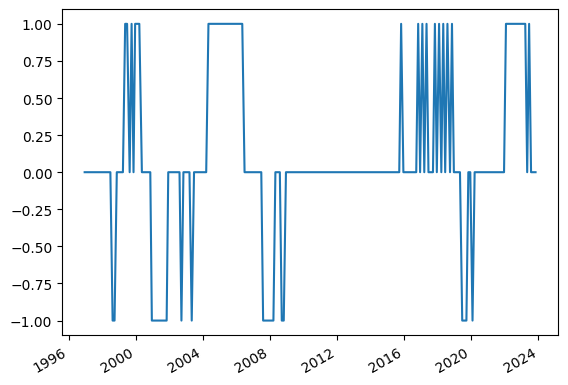

In [ ]:
df["Decisión Política Monetaria"].plot()

In [ ]:
df

,Fed Target Rate,Effective Fed Funds Rate,Tasa 1 Mes,Decisión Política Monetaria,Tasa 3 Meses,Dovish,Hawkish,Neutral
1996-12-17,5.250,5.08,4.956,0,5.01,0.052162,0.368901,0.578937
1997-03-25,5.500,5.36,4.468,0,5.04,0.052382,0.572558,0.375059
1997-07-01,5.500,5.49,5.129,0,5.11,0.114263,0.215239,0.670498
1997-08-19,5.500,5.42,4.776,0,4.90,0.074832,0.390257,0.534911
1997-09-30,5.500,5.44,4.635,0,5.13,0.102670,0.523849,0.373481
...,...,...,...,...,...,...,...,...
2023-05-03,5.125,5.08,5.710,0,5.21,0.137240,0.373069,0.489690
2023-06-14,5.125,5.08,5.150,1,5.23,0.100451,0.410815,0.488733
2023-07-26,5.375,5.33,5.280,0,5.29,0.158601,0.479939,0.361460
2023-09-20,5.375,5.33,5.340,0,5.35,0.135375,0.452688,0.411937


Dividimos los datos en 3 dataset distintos: Train, Test & Validation

A los datos los balanceamos y a las columnas categóricas las convertimos a un formato "one-hot encoding"

### Division de Fechas

In [ ]:
train_end_date = pd.Timestamp('2009-12-31')
val_start_date = pd.Timestamp('2010-01-01')
val_end_date = pd.Timestamp('2015-12-31')
train_set = df[df.index <= train_end_date]


###Train

In [ ]:
X_train=train_set.drop(columns=['Decisión Política Monetaria'])
y_train1=train_set['Decisión Política Monetaria']
y_train_logistic=y_train1.astype(int)


### Validation

In [ ]:
val_train_set = df[(df.index >= val_start_date) & (df.index <= val_end_date)]
X_val=val_train_set.drop(columns=['Decisión Política Monetaria'])
y_val1=val_train_set['Decisión Política Monetaria']
y_val=to_categorical(y_val1,num_classes=3)

### Test

In [ ]:
test_set = df[df.index > val_end_date]
X_test=test_set.drop(columns=['Decisión Política Monetaria'])
y_test=test_set['Decisión Política Monetaria']
y_test1=test_set['Decisión Política Monetaria']
y_test=to_categorical(y_test1,num_classes=3)

### Balanceado (SMOTE)

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train1)

### Categorical

In [ ]:
y_train=to_categorical(y_train_smote,num_classes=3)

###Logistic Regression data

In [ ]:
X_train_logistic=X_train_smote[['Fed Target Rate', 'Effective Fed Funds Rate', 'Tasa 1 Mes','Tasa 3 Meses']]
X_test_logistic=X_test[['Fed Target Rate', 'Effective Fed Funds Rate', 'Tasa 1 Mes','Tasa 3 Meses']]
X_val_logistic=X_val[['Fed Target Rate', 'Effective Fed Funds Rate', 'Tasa 1 Mes','Tasa 3 Meses']]


Funciones:

- Matriz de confusión

- Métricas importantes

In [ ]:
def confusion_matrix_graph(y_test, y_pred):

  conf_matrix = confusion_matrix(y_test, y_pred)

  # Display the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Class -1', 'Class 0', 'Class 1'],
              yticklabels=['Class -1', 'Class 0', 'Class 1'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
def metricas(y, y_pred, y_proba):
    metrics_dict = {
        "accuracy": accuracy_score(y, y_pred),
        "f1": f1_score(y, y_pred, average='macro'),
        "recall": recall_score(y, y_pred, average=None),
        "precision": precision_score(y, y_pred, average=None),
        "roc_auc_score": roc_auc_score(y, y_proba, multi_class='ovo'),
        "log_loss": log_loss(y, y_proba)
    }

    metrics_series = pd.DataFrame(metrics_dict)

    # # Plot bar graph
    plt.figure(figsize=(15, 15))
    ax = metrics_series.plot(kind='bar', colormap='viridis', edgecolor='white', alpha=0.7)

    plt.title('Classification Metrics by Class')
    plt.ylabel('Metric Value')
    plt.xlabel('Class')
    plt.xticks(rotation=0)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    return metrics_series

## Primer Modelo: Logistic Regression

Analizamos los datos sin tener en cuenta las informacion provista por las minutas y usamos un modelo Lineal

Para LogisticRegression usar:


**Para entrenar:** X_train_logistic, y_train_smote

**Para testear:** X_test_logistic, y_test1

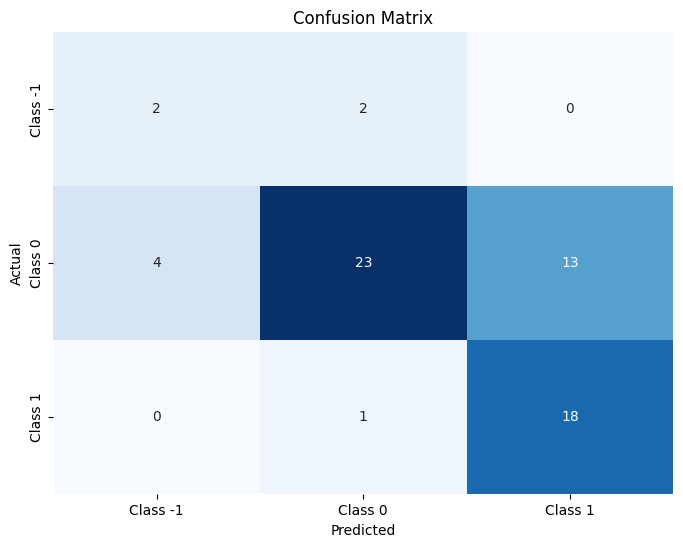

In [ ]:
lr = LogisticRegression(random_state=42, class_weight='balanced', fit_intercept=False)
lr.fit(X_train, y_train_logistic)
y_pred = lr.predict(X_test)
y_prob=lr.predict_proba(X_test)

y_test1.value_counts()
confusion_matrix_graph(y_test1, y_pred)


<Figure size 1500x1500 with 0 Axes>

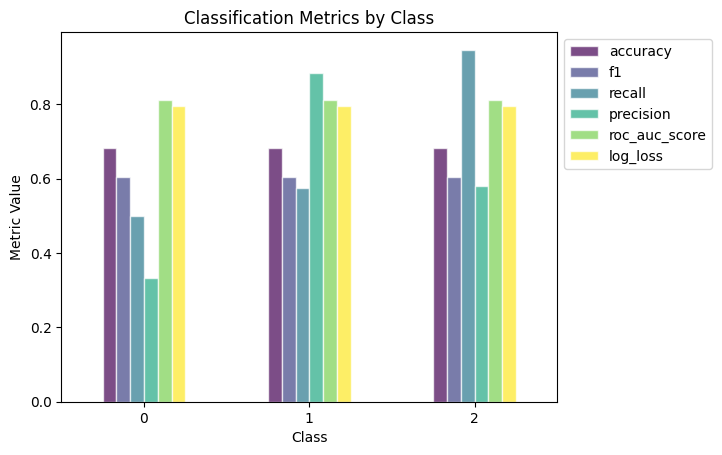

,accuracy,f1,recall,precision,roc_auc_score,log_loss
0,0.68254,0.605657,0.500000,0.333333,0.811842,0.795453
1,0.68254,0.605657,0.575000,0.884615,0.811842,0.795453
2,0.68254,0.605657,0.947368,0.580645,0.811842,0.795453


In [ ]:
metricas(y_test1,y_pred,y_prob)

##Segundo Modelo: MLP

Utilizamos un modelo de redes neuronales sin la informacion provista por las minutas

Para MLP usar:


**Para entrenar:** X_train_logistic, y_train

**Para validación:** X_val_logistic, y_val

**Para testear:** X_test_logistic, y_test1

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [ ]:
patience=20
learning_rate=0.001
MAX_EPOCHS = 500
model=dense
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                    patience=patience,
                                                      mode='min')

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train_logistic, y_train, epochs=MAX_EPOCHS, validation_data=(X_val_logistic,y_val),batch_size=30, callbacks=[early_stopping])

Epoch 1/500
6/6 [==============================] - 3s 63ms/step - loss: 1.2567 - accuracy: 0.2712 - val_loss: 1.0987 - val_accuracy: 0.0417
Epoch 2/500
6/6 [==============================] - 0s 14ms/step - loss: 1.1399 - accuracy: 0.3107 - val_loss: 1.1053 - val_accuracy: 0.0208
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 1.1190 - accuracy: 0.3333 - val_loss: 1.1128 - val_accuracy: 0.0208
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 1.0932 - accuracy: 0.4011 - val_loss: 1.1097 - val_accuracy: 0.0000e+00
Epoch 5/500
6/6 [==============================] - 0s 14ms/step - loss: 1.0917 - accuracy: 0.3842 - val_loss: 1.1014 - val_accuracy: 0.0417
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 1.0750 - accuracy: 0.4576 - val_loss: 1.0937 - val_accuracy: 0.1875
Epoch 7/500
6/6 [==============================] - 0s 14ms/step - loss: 1.0674 - accuracy: 0.4350 - val_loss: 1.0890 - val_accuracy: 0.2292
Epoch 8/500
6/6 

In [ ]:
predicted_classes=model.predict(X_test_logistic)

2/2 [==============================] - 0s 9ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X_test_logistic)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes
#predict_proba=model.predict_proba(X_test_logistic)


2/2 [==============================] - 0s 5ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
predicted_classes=np.where(predicted_classes == 2, -1, np.where(predicted_classes ==1, 1, 0))

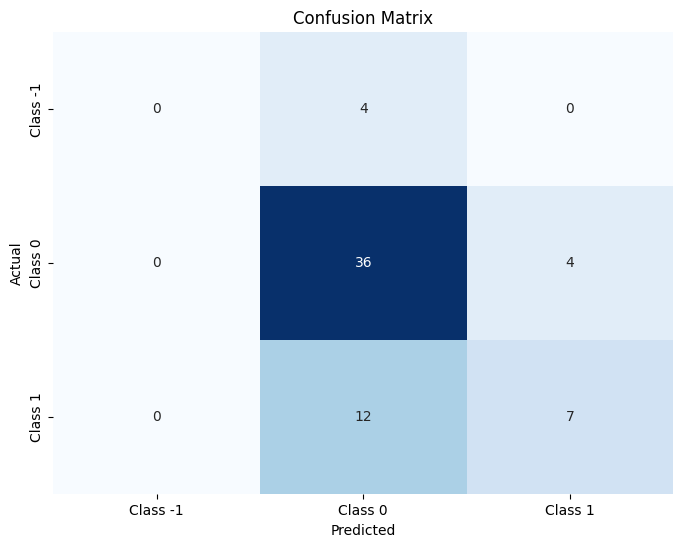

In [ ]:
confusion_matrix_graph(y_test1, predicted_classes)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x1500 with 0 Axes>

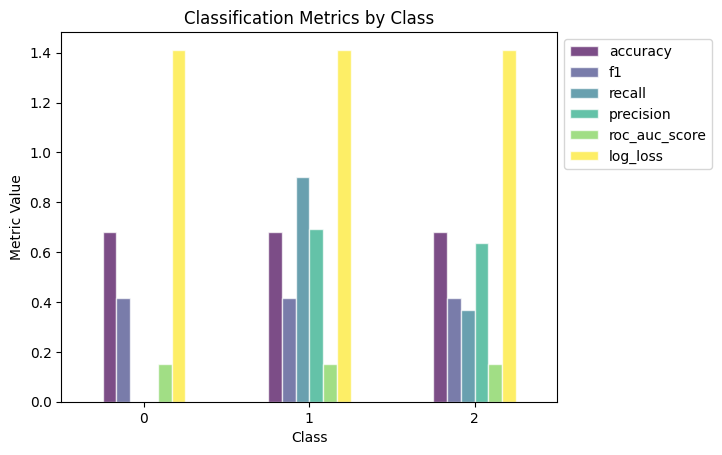

,accuracy,f1,recall,precision,roc_auc_score,log_loss
0,0.68254,0.416425,0.000000,0.000000,0.152906,1.412191
1,0.68254,0.416425,0.900000,0.692308,0.152906,1.412191
2,0.68254,0.416425,0.368421,0.636364,0.152906,1.412191


In [ ]:
metricas(y_test1,predicted_classes,predictions)

## Tercer Modelo: MLP con información adicional de las minutas

Utilizamosla información de las minutas junto con un modelos de redes neuronales.

**Para entrenar:** X_train, y_train

**Para validación:** X_val, y_val

**Para testear:** X_test, y_test1

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),

    tf.keras.layers.Dense(units=3, activation='softmax')
])


In [ ]:
### anlisis del error
len(X_train_smote), len(X_val), len(y_train), len(y_val)

(177, 48, 177, 48)

In [ ]:
patience=20
learning_rate=0.001
MAX_EPOCHS = 500
model=dense
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                    patience=patience,
                                                      mode='min')

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train_smote, y_train, epochs=MAX_EPOCHS, validation_data=(X_val,y_val),batch_size=30, callbacks=[early_stopping])

Epoch 1/500
6/6 [==============================] - 2s 40ms/step - loss: 1.1053 - accuracy: 0.4237 - val_loss: 1.0379 - val_accuracy: 0.9792
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 1.0286 - accuracy: 0.7006 - val_loss: 0.9976 - val_accuracy: 0.9792
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 1.0130 - accuracy: 0.5989 - val_loss: 0.9596 - val_accuracy: 0.9792
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.9903 - accuracy: 0.6667 - val_loss: 0.9310 - val_accuracy: 0.9792
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.9586 - accuracy: 0.6893 - val_loss: 0.9038 - val_accuracy: 0.9792
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 0.9234 - accuracy: 0.7006 - val_loss: 0.8644 - val_accuracy: 0.9792
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 0.8930 - accuracy: 0.7458 - val_loss: 0.8219 - val_accuracy: 0.9792
Epoch 8/500
6/6 [========

2/2 [==============================] - 0s 4ms/step


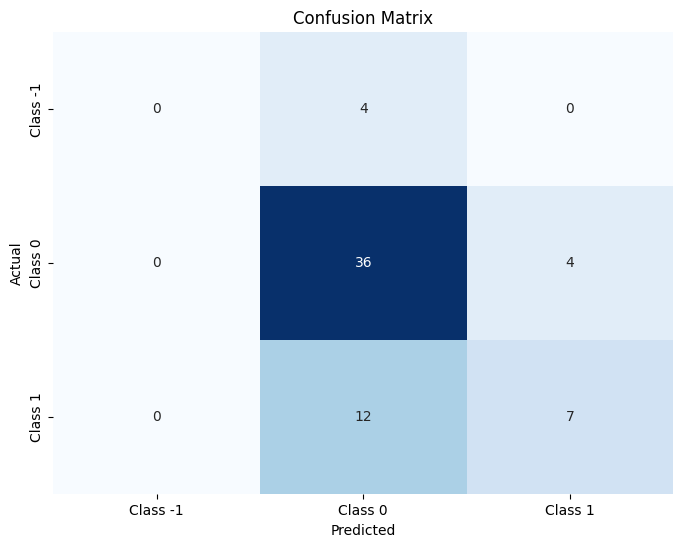

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'model' is your trained logistic regression model
# and 'X_test' and 'y_test' are your test set features and labels

# Make predictions
predictions = model.predict(X_test)
predicted_classes=np.where(predicted_classes == 2, -1, np.where(predicted_classes ==1, 1, 0))
confusion_matrix_graph(y_test1, predicted_classes)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x1500 with 0 Axes>

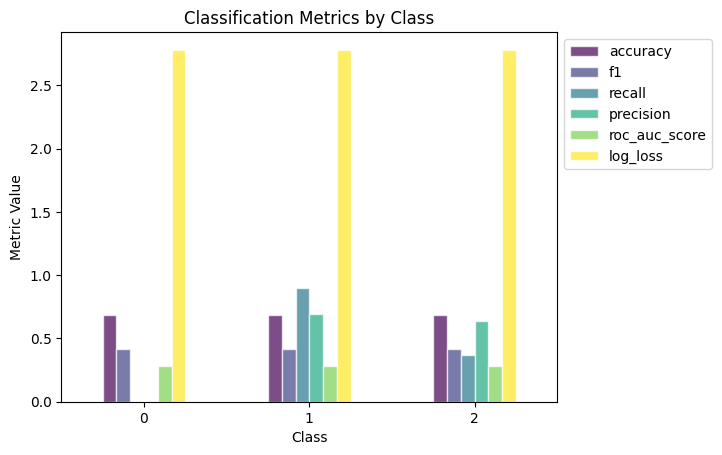

,accuracy,f1,recall,precision,roc_auc_score,log_loss
0,0.68254,0.416425,0.000000,0.000000,0.279386,2.780337
1,0.68254,0.416425,0.900000,0.692308,0.279386,2.780337
2,0.68254,0.416425,0.368421,0.636364,0.279386,2.780337


In [ ]:
metricas(y_test1,predicted_classes,predictions)


## Logistic regression Dovish, Hawkish, Neutral

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smote, y_train_smote)
y_pred = lr.predict(X_test)
y_prob=lr.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


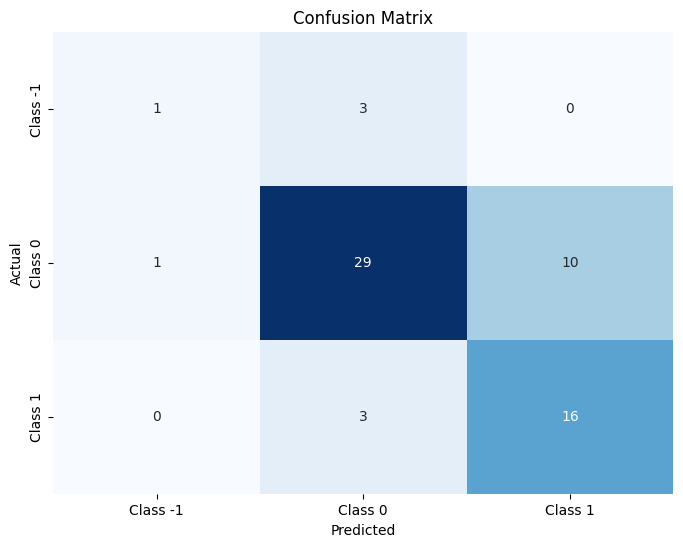

In [ ]:
confusion_matrix_graph(y_test1, y_pred)

<Figure size 1500x1500 with 0 Axes>

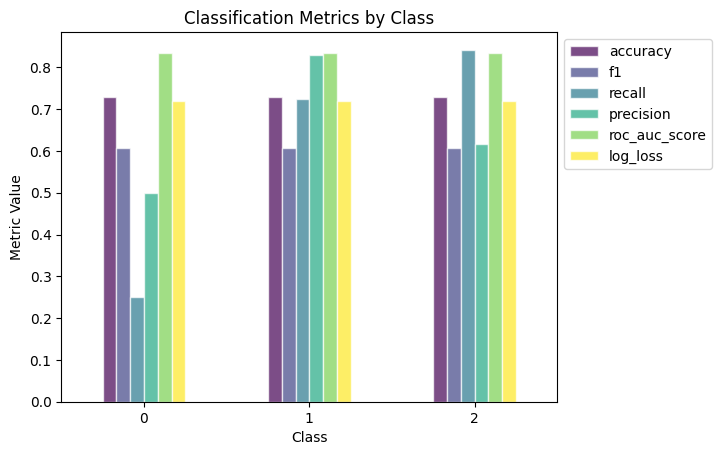

,accuracy,f1,recall,precision,roc_auc_score,log_loss
0,0.730159,0.605926,0.250000,0.500000,0.833498,0.718707
1,0.730159,0.605926,0.725000,0.828571,0.833498,0.718707
2,0.730159,0.605926,0.842105,0.615385,0.833498,0.718707


In [ ]:
metricas(y_test1,y_pred,y_prob)